In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
from sklearn.model_selection import train_test_split


In [ ]:
#Loading Dataset

In [21]:
sales=pd.read_csv('C:/Users/LENOVO/Desktop/DS/Assingments/15-Random Forests/Company_data.csv')
sales.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [22]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


<b> DATA PREPROCESSING </b>

In [23]:
sales=pd.get_dummies(sales,columns=['Urban','US'], drop_first=True)
sales['ShelveLoc']=sales['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})
sales

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,3,50,12,1,1


In [25]:
sales["Sales"] = pd.cut(sales["Sales"], bins = [-1,6,11,20], labels = ["1", "2","3"])
sales.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,2,138,73,11,276,120,3,42,17,1,1
1,3,111,48,16,260,83,1,65,10,1,1
2,2,113,35,10,269,80,2,59,12,1,1
3,2,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,3,38,13,1,0


<b>Here we are taking sales as dependent variable as we have to build the model to know which segments are effecting the sales</b>

In [27]:
x=sales.iloc[:,1:]
y=sales['Sales']

In [61]:
# Splitting data into training and testing data set

In [28]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.33,random_state=42)
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((268, 10), (268,), (132, 10), (132,))

## Random Forest Model

In [50]:
model = RandomForestClassifier(n_estimators=100)

In [51]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

2    95
1    30
3     7
dtype: int64

In [53]:
pd.crosstab(y_test,preds)

col_0,1,2,3
Sales,,,
1,21,14,0
2,9,66,2
3,0,15,5


In [63]:
# The accuracy of model is 69%

In [55]:
np.mean(preds==y_test)

0.696969696969697

### Segment Importance


In [56]:
important_features = model.feature_importances_
important_features

array([0.12984582, 0.10907985, 0.09671194, 0.1094212 , 0.19182946,
       0.14424638, 0.1183699 , 0.06834904, 0.01556363, 0.01658279])

In [ ]:
# Important segments that effect the sales of the company

In [57]:
important_features_df=pd.DataFrame(important_features,columns=['importance'])
important_features_df['features']=pd.DataFrame(x.columns)
important_features_df

,importance,features
0,0.129846,CompPrice
1,0.109080,Income
2,0.096712,Advertising
3,0.109421,Population
4,0.191829,Price
5,0.144246,ShelveLoc
6,0.118370,Age
7,0.068349,Education
8,0.015564,Urban_Yes
9,0.016583,US_Yes


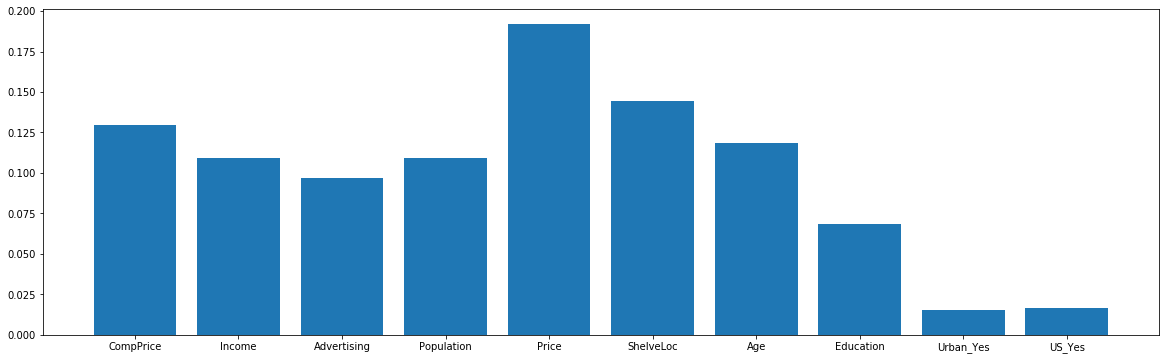

In [58]:
plt.figure(figsize =(20, 6))

plt.bar(important_features_df['features'], important_features_df['importance'], orientation = 'vertical');

<b> From above table and bar graph we can see Price is most important segment which effect sales of the company </b>